## ERDAP with erddapy example for ITAE Prawler - 2019 M2 (BSITAEPR-2A)

__pyversion__==3.7   
__author__==S.Bell

In [35]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2019-05-31 11:51:31.125136


### connecting and basic information

In [36]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

from erddapy import ERDDAP
import pandas as pd
import numpy as np

server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

In [37]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='PRAWLER'))

In [38]:
'We have {} tabledap, {} griddap, and {} wms endpoints.'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
)

'We have 10 tabledap, 0 griddap, and 0 wms endpoints.'

In [39]:
prawlers = df['Dataset ID'].values
print(prawlers)

['erddap_4fd3_fb30_b89f' 'erddap_17bsitae_prawler'
 'erddap_17ckitaem2a_prawler' 'erddap_18bsitaepr2a_prawler'
 'erddap_18mtitaepr1a_prawler' 'erddap_19bsitaepr2a_prawler'
 'erddap_17ckitaem2a_met' 'erddap_18bsitaepr2a_met'
 'erddap_18mtitaepr1a_met' 'erddap_19bsitaepr2a_met']


In [40]:
variables = [e.get_var_by_attr(dataset_id=prawler, standard_name=lambda v: v is not None) for prawler in prawlers]
print(variables)

[['Salinity', 'depth', 'time', 'latitude', 'longitude', 'Chlorophyll'], ['Salinity', 'depth', 'time', 'latitude', 'longitude', 'Chlorophyll'], ['SigmaT', 'Salinity', 'Temperature', 'Oxy_Sat', 'Oxy_Conc', 'depth', 'Oxy_Temperature', 'time', 'Turbidity', 'latitude', 'longitude', 'Chlorophyll'], ['Salinity', 'depth', 'time', 'latitude', 'longitude', 'Chlorophyll'], ['Salinity', 'depth', 'time', 'latitude', 'longitude', 'Chlorophyll'], ['Salinity', 'depth', 'time', 'latitude', 'longitude', 'Chlorophyll'], ['northward_wind', 'time', 'latitude', 'air_pressure', 'relative_humidity', 'wind_speed', 'eastward_wind', 'wind_from_direction', 'longitude', 'air_temperature'], ['northward_wind', 'time', 'latitude', 'air_pressure', 'relative_humidity', 'wind_speed', 'eastward_wind', 'wind_from_direction', 'longitude', 'air_temperature'], ['northward_wind', 'time', 'latitude', 'air_pressure', 'relative_humidity', 'wind_speed', 'eastward_wind', 'wind_from_direction', 'longitude', 'air_temperature'], ['la

### retrieving and plotting data

In [41]:
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='erddap_19bsitaepr2a_prawler'

d.variables =  [
 'profile_id',
 'Temperature',
 'Salinity',
 'Chlorophyll',
 'Turbidity',
 'latitude',
 'longitude',
 'depth',
 "time",
 'Oxy_Conc',
 'Oxy_Sat'
]

d.constraints = {
    'time>=': '2019-01-01T00:00:00Z',
    'time<=': '2019-10-10T00:00:00Z',
}

In [42]:
d.get_download_url()

'http://downdraft.pmel.noaa.gov:8080/erddap/tabledap/erddap_19bsitaepr2a_prawler.csv?profile_id,Temperature,Salinity,Chlorophyll,Turbidity,latitude,longitude,depth,time,Oxy_Conc,Oxy_Sat&time>=1546300800.0&time<=1570665600.0'

In [43]:
df = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.head()

,profile_id,Temperature,Salinity (PSU),Chlorophyll,Turbidity,latitude (degrees_north),longitude (degrees_east),depth (m),Oxy_Conc,Oxy_Sat (percent)
time (UTC),,,,,,,,,,
2019-04-24 23:31:37+00:00,1,3.991,31.933832,0.0,0.0,56.873,-164.065,3.17,344.53590,106.924130
2019-04-24 23:31:45+00:00,1,3.897,31.935938,0.0,0.0,56.873,-164.065,3.28,345.39206,106.946976
2019-04-24 23:31:53+00:00,1,3.878,31.935360,0.0,0.0,56.873,-164.065,3.77,346.16818,107.137310
2019-04-24 23:32:01+00:00,1,3.819,31.938852,0.0,0.0,56.873,-164.065,3.44,346.57874,107.113230
2019-04-24 23:32:09+00:00,1,3.898,31.939550,0.0,0.0,56.873,-164.065,3.54,346.03660,107.152070


In [44]:
df.tail()

,profile_id,Temperature,Salinity (PSU),Chlorophyll,Turbidity,latitude (degrees_north),longitude (degrees_east),depth (m),Oxy_Conc,Oxy_Sat (percent)
time (UTC),,,,,,,,,,
2019-05-31 14:05:50+00:00,1022,4.024,31.913390,0.2440,0.6916,56.873,-164.065,37.89,287.24066,89.20071
2019-05-31 14:05:58+00:00,1022,4.020,31.910540,0.3660,0.1976,56.873,-164.065,39.59,286.69100,89.01948
2019-05-31 14:06:06+00:00,1022,4.019,31.909334,0.4148,0.1729,56.873,-164.065,41.56,286.27300,88.88672
2019-05-31 14:06:14+00:00,1022,4.022,31.907677,0.2562,0.3211,56.873,-164.065,43.70,286.00750,88.80964
2019-05-31 14:06:22+00:00,1022,4.017,31.905820,0.2806,0.3211,56.873,-164.065,45.36,285.51830,88.64574


#### Temperature

In [45]:
#qc
df['Temperature'][df['Temperature']>20]=np.nan

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean

Text(0, 0.5, 'Depth (m)')

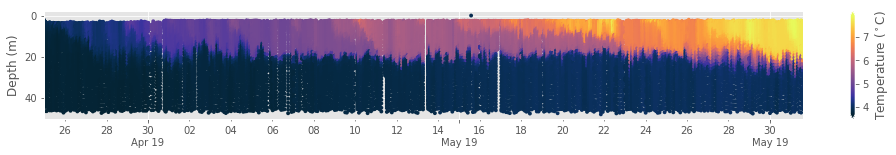

In [47]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=df['Temperature'], marker='o', edgecolor='none', cmap=cmocean.cm.thermal)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

In [48]:
print("""
max temp: {0:0.4}
min temp: {1:0.4}""".format(df['Temperature'].max(), df['Temperature'].min()))


max temp: 7.935
min temp: 3.673


#### Salinity

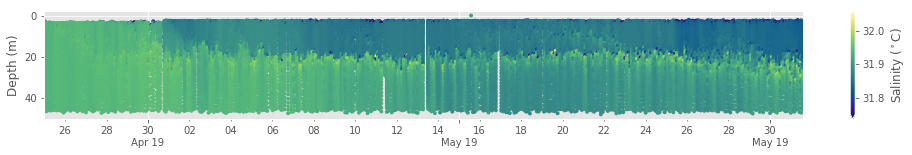

In [49]:
#bounds
lower = df['Salinity (PSU)'].mean()-3*df['Salinity (PSU)'].std()
upper = df['Salinity (PSU)'].mean()+3*df['Salinity (PSU)'].std()

#plot
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=df['Salinity (PSU)'], marker='o', edgecolor='none', vmin=lower, vmax=upper, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

In [50]:
print("""
max sal: {0:0.4}
min sal: {1:0.4}""".format(df['Salinity (PSU)'].max(), df['Salinity (PSU)'].min()))

print("""
mean sal: {0:0.4}
sal std: {1:04}""".format(df['Salinity (PSU)'].mean(),df['Salinity (PSU)'].std()))


max sal: 32.96
min sal: 31.19

mean sal: 31.9
sal std: 0.04864305944550518


#### Chlorophyl

Text(0, 0.5, 'Depth (m)')

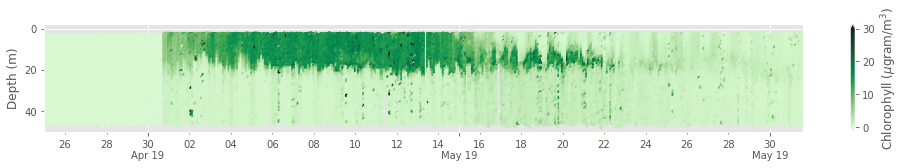

In [51]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=df['Chlorophyll'], marker='o', edgecolor='none', vmin=0, vmax=30, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/m$^3$)')
ax.set_ylabel('Depth (m)')


In [52]:
print("""
max chlorophyll: {0:0.4}
min chlorophyll: {1:0.4}""".format(df['Chlorophyll'].max(), df['Chlorophyll'].min()))


max chlorophyll: 49.78
min chlorophyll: -0.61


#### Chlorophyl (log scale)

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0, 0.5, 'Depth (m)')

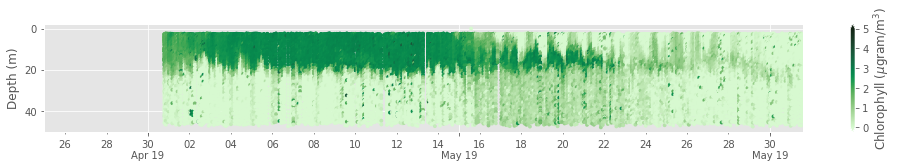

In [53]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=np.log(df['Chlorophyll']), marker='o', edgecolor='none', vmin=0, vmax=5, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/m$^3$)')
ax.set_ylabel('Depth (m)')

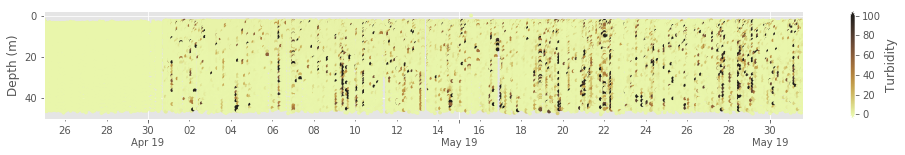

In [54]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=df['Turbidity'], marker='o', edgecolor='none', vmin=0, vmax=100, cmap=cmocean.cm.turbid)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Turbidity')
ax.set_ylabel('Depth (m)');

In [55]:
import seawater as sw
sigmat = sw.dens(s=df['Salinity (PSU)'],t=df['Temperature'],p=df['depth (m)']) - 1000.

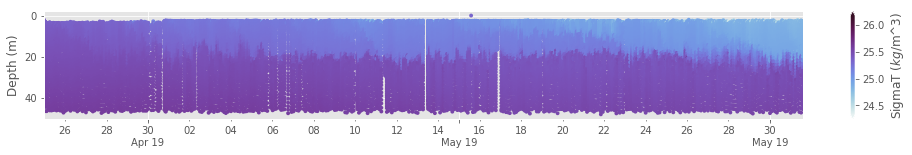

In [56]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=sigmat, marker='o', edgecolor='none', cmap=cmocean.cm.dense)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('SigmaT ($kg/$m^3)')
ax.set_ylabel('Depth (m)');

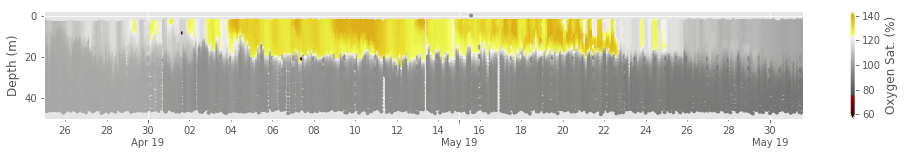

In [57]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=df['Oxy_Sat (percent)'], marker='o', vmin=60, vmax=140, edgecolor='none', cmap=cmocean.cm.oxy)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Sat. (%)')
ax.set_ylabel('Depth (m)');

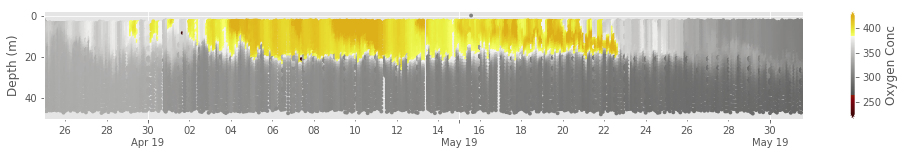

In [58]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=df['Oxy_Conc'], marker='o', vmin=225, vmax=425, edgecolor='none', cmap=cmocean.cm.oxy)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Conc')
ax.set_ylabel('Depth (m)');

#### Descent Rate

In [59]:
#calculate diverate
df['descentrate (m/s)'] = df['depth (m)'].diff()/df.index.to_series().diff().dt.seconds

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  


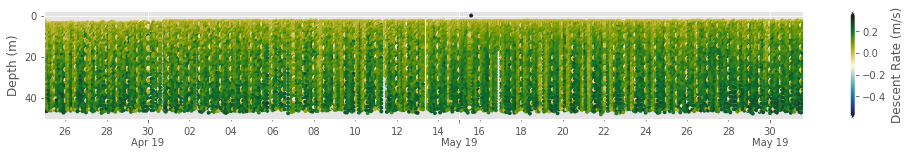

In [60]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth (m)'], s=15, c=df['descentrate (m/s)'], marker='o', edgecolor='none', cmap=cmocean.cm.delta)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Descent Rate (m/s)')
ax.set_ylabel('Depth (m)');

### Calibration/Characterization Profiles - last 7 day

In [61]:
#groupby profile id


dfsub=df[(datetime.datetime.today()-datetime.timedelta(days=1)).strftime('%Y-%m-%d')]
dfsg = dfsub.groupby('profile_id')

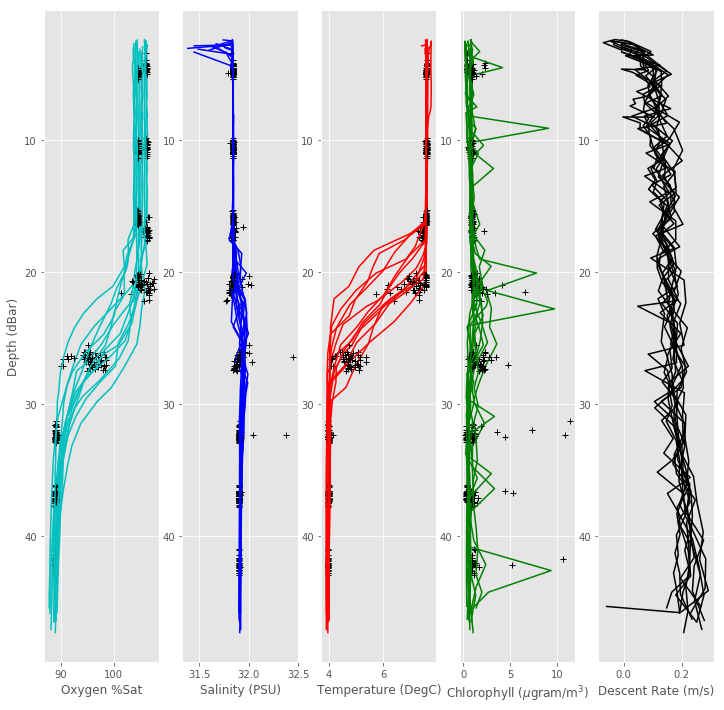

In [62]:
fig, ax = plt.subplots(1,5,figsize=(12, 12))

for i,cast in enumerate(dfsg.groups):
    if dfsg.get_group(cast)['depth (m)'].std() > 1:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat (percent)'],dfsg.get_group(cast)['depth (m)'],'c-')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity (PSU)'],dfsg.get_group(cast)['depth (m)'],'b-')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'],dfsg.get_group(cast)['depth (m)'],'r-')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'],dfsg.get_group(cast)['depth (m)'],'g-')
        cs = ax[4].plot(dfsg.get_group(cast)['descentrate (m/s)'],dfsg.get_group(cast)['depth (m)'],'k-')
    else:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat (percent)'],dfsg.get_group(cast)['depth (m)'],'k+')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity (PSU)'],dfsg.get_group(cast)['depth (m)'],'k+')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'],dfsg.get_group(cast)['depth (m)'],'k+')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'],dfsg.get_group(cast)['depth (m)'],'k+')
    #dfsg.get_group(cast).to_csv(str(cast)+'.csv')

ax[0].set_xlabel('Oxygen %Sat')        
ax[0].set_ylabel('Depth (dBar)')        
ax[0].invert_yaxis()
ax[1].set_xlabel('Salinity (PSU)')        
ax[1].invert_yaxis()
ax[2].set_xlabel('Temperature (DegC)')        
ax[2].invert_yaxis()
ax[3].set_xlabel('Chlorophyll ($\mu$gram/m$^3$)')        
ax[3].invert_yaxis()
ax[4].set_xlabel('Descent Rate (m/s)')        
ax[4].invert_yaxis()

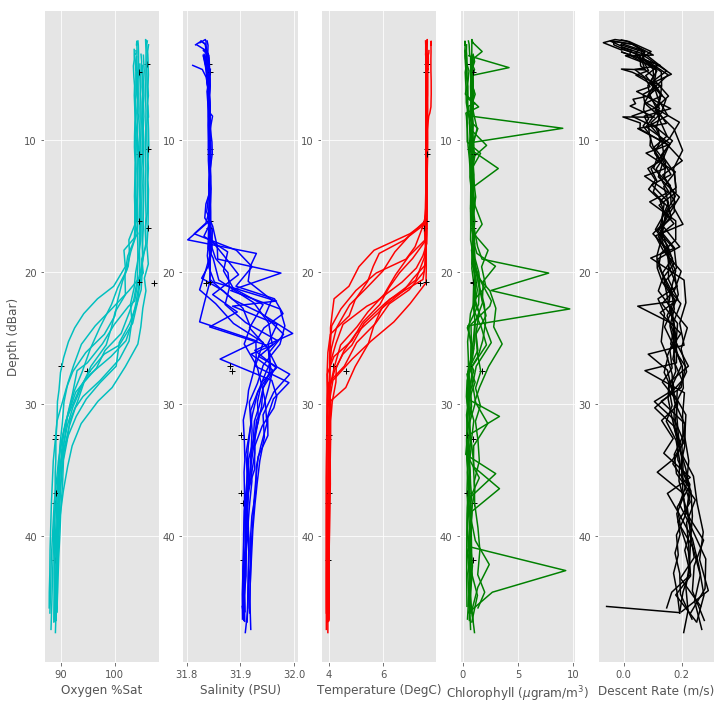

In [63]:
fig, ax = plt.subplots(1,5,figsize=(12, 12))

for i,cast in enumerate(dfsg.groups):
    if dfsg.get_group(cast)['depth (m)'].std() > 1:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat (percent)'][1:],dfsg.get_group(cast)['depth (m)'][1:],'c-')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity (PSU)'][1:],dfsg.get_group(cast)['depth (m)'][1:],'b-')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'][1:],dfsg.get_group(cast)['depth (m)'][1:],'r-')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'][1:],dfsg.get_group(cast)['depth (m)'][1:],'g-')
        cs = ax[4].plot(dfsg.get_group(cast)['descentrate (m/s)'],dfsg.get_group(cast)['depth (m)'],'k-')
    else:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat (percent)'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity (PSU)'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')

ax[0].set_xlabel('Oxygen %Sat')        
ax[0].set_ylabel('Depth (dBar)')        
ax[0].invert_yaxis()
ax[1].set_xlabel('Salinity (PSU)')        
ax[1].invert_yaxis()
ax[2].set_xlabel('Temperature (DegC)')        
ax[2].invert_yaxis()
ax[3].set_xlabel('Chlorophyll ($\mu$gram/m$^3$)')        
ax[3].invert_yaxis()
ax[4].set_xlabel('Descent Rate (m/s)')        
ax[4].invert_yaxis()

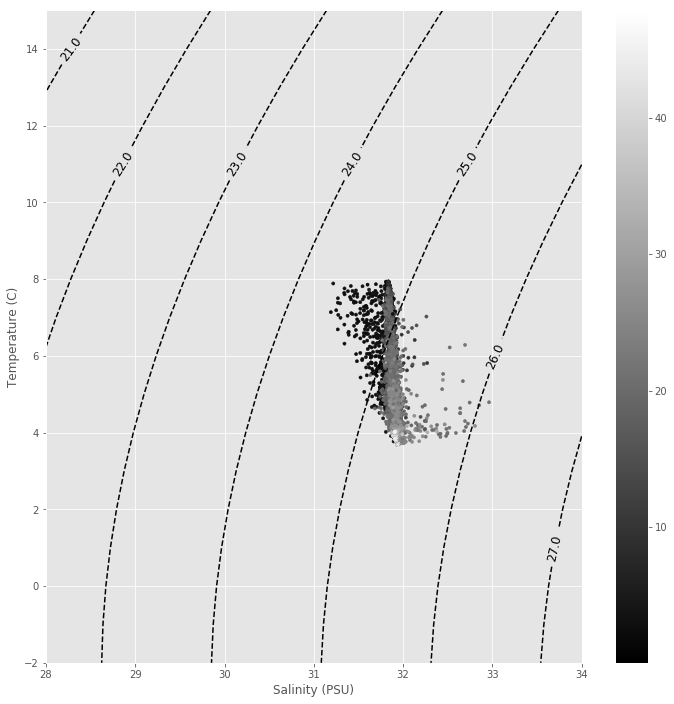

In [64]:

def plot_salvtemp(salt, temp, press, srange=[28,34], trange=[-2,15], ptitle=""): 
    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in {cruise} {cast} file. Likely  missing data \n'.format(cruise=cruise,cast=cast))
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    fig = plt.figure(figsize=(12, 12))
    ax1 = fig.add_subplot(111)
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=press, cmap='gray', s=10)
    plt.colorbar(ts )
    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
 
    ax1.set_xlabel('Salinity (PSU)')
    ax1.set_ylabel('Temperature (C)')

    
    t = fig.suptitle(ptitle, fontsize=12, fontweight='bold')
    t.set_y(1.08)
    return fig  

fig = plot_salvtemp(df['Salinity (PSU)'],df['Temperature'],df['depth (m)'])

### Bin data to calculate integrate heat proxy (depth averaged temperature)

Setup 1m bins:
- code below will make all data deeper than prawler missing, thus biasing the averages to the upper 40m-50m.  Shapes may likely stay the same if the column is mixed, but maginitudes will be less.

In [65]:
#depth averaged temp - interpolate to 1m bins before averaging
def depth_ave(param, print_values=False):
    dfint= df.groupby('profile_id')

    fig, ax = plt.subplots(figsize=(17, 2))

    for i,cast in enumerate(dfint.groups):
        if dfint.get_group(cast)['depth (m)'].std() > 1:
            #only use available data... bias towards prawler
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth (m)'], dfint.get_group(cast)[param], right=np.nan, left=np.nan)
            cs = ax.scatter(dfint.get_group(cast).index[0], np.nanmean(IntTemp), s=15, c='g', marker='o', edgecolor='none')
            
            #extrapolate to top and bottom
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth (m)'], dfint.get_group(cast)[param])
            cs = ax.scatter(dfint.get_group(cast).index[0], np.nanmean(IntTemp), s=15, c='r', marker='o', edgecolor='none')
            
            if print_values:
                print("{0},{1}".format(dfint.get_group(cast).index[0], np.nanmean(IntTemp)))

        xfmt = mdates.DateFormatter('%d-%b')
        ax.xaxis.set_major_formatter(xfmt)

        ax.set_ylabel(param)
        ax.set_xlabel('Time (UTC)')  


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


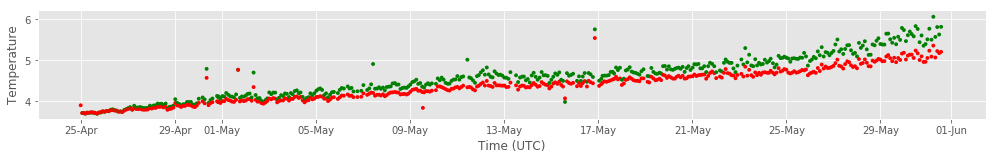

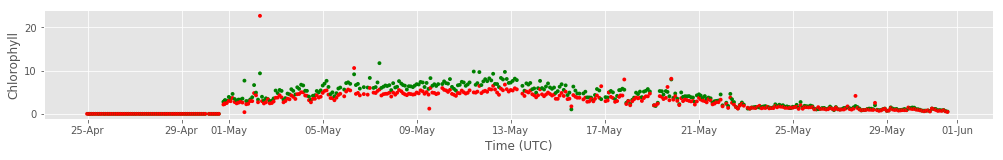

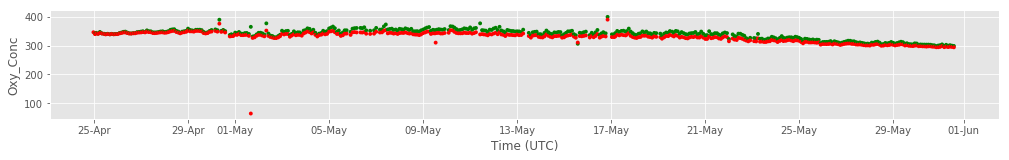

In [66]:
#depth averaged temp - interpolate to 1m bins before averaging
depth_ave('Temperature',print_values=False)
#depth averaged chlor - interpolate to 1m bins before averaging
depth_ave('Chlorophyll')
#depth averaged oxy - interpolate to 1m bins before averaging
depth_ave('Oxy_Conc')

- Above plots, red plots result from extrapolating the last point down to 74m (**74m historically when calculating ht content**), and up to the sfc then taking the mean.  Green points result from making all data below the prawler and above the prawler, "missing" and then taking the mean.

In [67]:
#depth chosen temp - interpolate to 1m bins before retrieving
def depth_csv(param,depth):
    dfint= df.groupby('profile_id')


    for i,cast in enumerate(dfint.groups):
        if dfint.get_group(cast)['depth'].std() > 1:
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth'], dfint.get_group(cast)[param])
            print("{0},{1}".format(dfint.get_group(cast).index[depth], IntTemp))

    #print just last data point as a sanity check
    #print("{0},{1}".format(dfint.get_group(cast).index, IntTemp))
#depth_csv('Temperature',5)


In [68]:
draw =pd.read_csv('/Volumes/WDC_internal/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/year_over_year/raw_prawler_data/2018Prawler.csv',
                  parse_dates=['datetime'], index_col='datetime')
draw.resample('1h').mean().interpolate(limit=1).to_csv('Prawler_1hr.csv')

FileNotFoundError: [Errno 2] File b'/Volumes/WDC_internal/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/year_over_year/raw_prawler_data/2018Prawler.csv' does not exist: b'/Volumes/WDC_internal/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/year_over_year/raw_prawler_data/2018Prawler.csv'